# TrendTracker: Exploring Trending Youtube Videos in Canada

### Introduction

When browsing Kaggle, I was fortunate enough to find a dataset that contained data on Youtube videos. Specically, this dataset highlights trending videos, with additional data such as tags, description, etc. This type of data is very applicable to life, so I decided to go ahead and explore it. I want to know what makes a video viral!

#### Goals
Some of the goals I have for this project are also inspired by the creator, **Rishav Sharma**.

1. Categorize and cluster youtube videos based on features
  
2. Analyze what features make a youtube video successful
  
3. See the overall trend of youtube success, and apply that to future trending videos

### Import Libraries and Data

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [77]:
# File name represents most recent update
file = r'/Users/OliverPan/Desktop/youtube_data/trend_12-03-20.csv'

In [78]:
trends = pd.read_csv(file)

In [79]:
# Change format
pd.options.display.float_format = '{:.5f}'.format

### Exploratory Data Analysis

In [80]:
# Get a feel for how the data looks
trends.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296541,6180,30059,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
1,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353797,2628,40222,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
2,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146740,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
3,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156914,5857,35331,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45803,964,2198,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [81]:
trends.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')

In [82]:
# See the size and structure of data
trends.shape

(22400, 16)

This means we have 22400 rows of data, and 16 columns per row

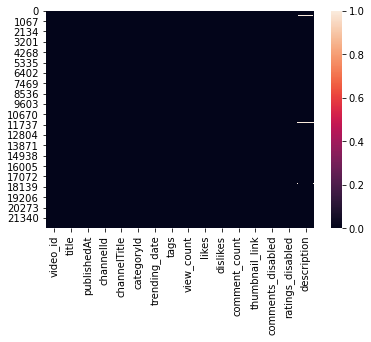

In [83]:
# Are we missing any values (NULL)
sns.heatmap(trends.isnull())

In [84]:
# Taking a closer look at null values
trends[trends['description'].isnull()].head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
90,yyXGTANms4g,BENEFIT PAPA,2020-08-11T09:28:25Z,UCxAkiUiL3KnMl0BIFBv6xxA,Mr Macaroni,24,2020-08-12T00:00:00Z,[None],121898,8795,60,1205,https://i.ytimg.com/vi/yyXGTANms4g/default.jpg,False,False,NaN
222,NSuaUok-wTY,[1147] Locksmith Says My Videos Are BS... Lose...,2020-08-12T13:00:12Z,UCm9K6rby98W8JigLoZOh6FQ,LockPickingLawyer,27,2020-08-13T00:00:00Z,Lock|picking,422963,62940,168,7301,https://i.ytimg.com/vi/NSuaUok-wTY/default.jpg,False,False,NaN
317,yyXGTANms4g,BENEFIT PAPA,2020-08-11T09:28:25Z,UCxAkiUiL3KnMl0BIFBv6xxA,Mr Macaroni,24,2020-08-13T00:00:00Z,[None],150314,9737,65,1282,https://i.ytimg.com/vi/yyXGTANms4g/default.jpg,False,False,NaN
445,NSuaUok-wTY,[1147] Locksmith Says My Videos Are BS... Lose...,2020-08-12T13:00:12Z,UCm9K6rby98W8JigLoZOh6FQ,LockPickingLawyer,27,2020-08-14T00:00:00Z,Lock|picking,511773,69611,214,7837,https://i.ytimg.com/vi/NSuaUok-wTY/default.jpg,False,False,NaN
542,yyXGTANms4g,BENEFIT PAPA,2020-08-11T09:28:25Z,UCxAkiUiL3KnMl0BIFBv6xxA,Mr Macaroni,24,2020-08-14T00:00:00Z,[None],173118,10486,74,1343,https://i.ytimg.com/vi/yyXGTANms4g/default.jpg,False,False,NaN


We can see that we have a couple nulls in the description column. We can fix that up later.

In [85]:
# Explore data types to see what we are working with
trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22400 entries, 0 to 22399
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           22400 non-null  object
 1   title              22400 non-null  object
 2   publishedAt        22400 non-null  object
 3   channelId          22400 non-null  object
 4   channelTitle       22400 non-null  object
 5   categoryId         22400 non-null  int64 
 6   trending_date      22400 non-null  object
 7   tags               22400 non-null  object
 8   view_count         22400 non-null  int64 
 9   likes              22400 non-null  int64 
 10  dislikes           22400 non-null  int64 
 11  comment_count      22400 non-null  int64 
 12  thumbnail_link     22400 non-null  object
 13  comments_disabled  22400 non-null  bool  
 14  ratings_disabled   22400 non-null  bool  
 15  description        22274 non-null  object
dtypes: bool(2), int64(5), object(9)
memory u

In [86]:
# Turn trending_date and publishedAt to datetime format
trends['trending_date'] = trends['trending_date'].str[0:10]
trends['publishedAt'] = trends['publishedAt'].str[0:10]

In [87]:
trends['trending_date'] = pd.to_datetime(trends['trending_date'])
trends['publishedAt'] = pd.to_datetime(trends['publishedAt'])

In [88]:
# The video_id represents the youtube link, so we can feature engineer it in
trends['youtube_link'] = 'https://www.youtube.com/watch?v=' + trends['video_id']

In [89]:
# Let's see some columns
trends[['video_id', 'title', 'youtube_link']]

,video_id,title,youtube_link
0,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,https://www.youtube.com/watch?v=KX06ksuS6Xo
1,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,https://www.youtube.com/watch?v=J78aPJ3VyNs
2,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,https://www.youtube.com/watch?v=M9Pmf9AB4Mo
3,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,https://www.youtube.com/watch?v=3C66w5Z0ixs
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,https://www.youtube.com/watch?v=VIUo6yapDbc
...,...,...,...
22395,Wmi5R_SMxv0,"Rest In Peace, Uncle Phil",https://www.youtube.com/watch?v=Wmi5R_SMxv0
22396,KTsemYgLIBk,ITZY Performance Practice (Asia Artist Awards ...,https://www.youtube.com/watch?v=KTsemYgLIBk
22397,vHv4uyQ3J44,🎄The 2020 Clashmas Tree Is Here!🎄,https://www.youtube.com/watch?v=vHv4uyQ3J44
22398,lG-klvI4yzI,Fally Ipupa - Likolo feat. Ninho (Clip officiel),https://www.youtube.com/watch?v=lG-klvI4yzI


### Views, Likes, & Dislikes

In [90]:
numerical = trends[['video_id', 'view_count', 'likes', 'dislikes']]

In [91]:
numerical['view_count'].describe()

count       22400.00000
mean      2490682.58625
std       7104581.76535
min         37503.00000
25%        420217.75000
50%        920557.00000
75%       2153668.00000
max     232649205.00000
Name: view_count, dtype: float64

There is a high std with view_count meaning that there are large differences in view_count

In [92]:
# Looking at the video with highest view count
trends[trends['view_count'] == 232649205]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,youtube_link
3379,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-28,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,232649205,15735572,714195,6064909,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...,https://www.youtube.com/watch?v=gdZLi9oWNZg


In [93]:
numerical['likes'].describe()

count      22400.00000
mean      155618.90786
std       515116.63400
min            0.00000
25%        17379.75000
50%        46600.50000
75%       128303.25000
max     15735572.00000
Name: likes, dtype: float64

Apparently, a video had 0 likes and was still 'trending'

In [94]:
trends[trends['likes'] == 0]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,youtube_link
1221,rZUTFDjDZSQ,The Paris Hilton you never knew | This Is Pari...,2020-08-17,UCwl5c3q0uBK3mVv9OXQUeeQ,Paris Hilton,24,2020-08-18,Paris Hilton|Paris|Hilton|Documentary|This Is ...,330188,0,0,1362,https://i.ytimg.com/vi/rZUTFDjDZSQ/default.jpg,False,True,"This September 14th, meet the real Paris Hilto...",https://www.youtube.com/watch?v=rZUTFDjDZSQ
1333,b8pSdMHicYw,What Really Happened to Sean O'Malley vs Marlo...,2020-08-16,UCQ2xsPeC159i2RzHAme1gmg,kenanK TV,17,2020-08-18,sean o malley|sean o'malley|ufc 252|ufc 252 se...,391246,0,0,969,https://i.ytimg.com/vi/b8pSdMHicYw/default.jpg,False,True,In Sean O'malley's fight against Marlon Chito ...,https://www.youtube.com/watch?v=b8pSdMHicYw
1439,RHPRUe-aZHA,SuperM 슈퍼엠 '100' MV Reaction,2020-08-18,UCcjV926qiLr_Ghw6A0lTNjA,SuperM,10,2020-08-19,[None],958787,0,0,8315,https://i.ytimg.com/vi/RHPRUe-aZHA/default.jpg,False,True,SuperM's new single “100” is out!🎧Listen and d...,https://www.youtube.com/watch?v=RHPRUe-aZHA
1451,rZUTFDjDZSQ,The Paris Hilton you never knew | This Is Pari...,2020-08-17,UCwl5c3q0uBK3mVv9OXQUeeQ,Paris Hilton,24,2020-08-19,Paris Hilton|Paris|Hilton|Documentary|This Is ...,600752,0,0,1898,https://i.ytimg.com/vi/rZUTFDjDZSQ/default.jpg,False,True,"This September 14th, meet the real Paris Hilto...",https://www.youtube.com/watch?v=rZUTFDjDZSQ
1575,b8pSdMHicYw,What Really Happened to Sean O'Malley vs Marlo...,2020-08-16,UCQ2xsPeC159i2RzHAme1gmg,kenanK TV,17,2020-08-19,sean o malley|sean o'malley|ufc 252|ufc 252 se...,396637,0,0,947,https://i.ytimg.com/vi/b8pSdMHicYw/default.jpg,False,True,In Sean O'malley's fight against Marlon Chito ...,https://www.youtube.com/watch?v=b8pSdMHicYw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21558,kjVRROvfMEw,"T1, An Update, and My Future Plans",2020-11-24,UCWIfnDrWU_Cvc1a8qZribhA,LS,20,2020-11-29,T1|T1LoL|LS|LSXYZ9|Korea|South Korea|LCK|Analy...,271719,0,0,2465,https://i.ytimg.com/vi/kjVRROvfMEw/default.jpg,False,True,I'll be elaborating further on certain topics ...,https://www.youtube.com/watch?v=kjVRROvfMEw
21727,OZWGxfT8TM8,"Update on COVID-19 – November 24, 2020",2020-11-25,UCnuHHh1V4fubDUY_8YN8ysA,YourAlberta,25,2020-11-30,Alberta|Government of Alberta|Health|Dr. Deena...,281588,0,0,0,https://i.ytimg.com/vi/OZWGxfT8TM8/default.jpg,True,True,Premier Jason Kenney and officials provided an...,https://www.youtube.com/watch?v=OZWGxfT8TM8
21747,AMEC0uXDhvc,Paris Hilton Renovates Her Home - House Tour 2...,2020-11-25,UCwl5c3q0uBK3mVv9OXQUeeQ,Paris Hilton,24,2020-11-30,[None],811919,0,0,2147,https://i.ytimg.com/vi/AMEC0uXDhvc/default.jpg,False,True,So many incredible memories in my home but I a...,https://www.youtube.com/watch?v=AMEC0uXDhvc
21965,OZWGxfT8TM8,"Update on COVID-19 – November 24, 2020",2020-11-25,UCnuHHh1V4fubDUY_8YN8ysA,YourAlberta,25,2020-12-01,Alberta|Government of Alberta|Health|Dr. Deena...,281859,0,0,0,https://i.ytimg.com/vi/OZWGxfT8TM8/default.jpg,True,True,Premier Jason Kenney and officials provided an...,https://www.youtube.com/watch?v=OZWGxfT8TM8


Looks like this might be a flaw in our data, since it is highly unlikely that a video would have 0 likes and 0 dislikes and be trending

### Quick Feature Engineering

In [95]:
trends['likes_to_dislikes'] = trends['likes'] / trends['dislikes']

In [96]:
trends['likes_to_dislikes'].describe()

count   22248.00000
mean       80.11951
std        83.58158
min         0.13961
25%        30.72792
50%        58.27218
75%        99.91116
max      1659.80000
Name: likes_to_dislikes, dtype: float64

In [97]:
trends[trends['likes_to_dislikes'] == 1659.80000]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,youtube_link,likes_to_dislikes
14088,NEpKlsUw9XU,ghost + guest 👻🎶,2020-10-19,UCdkkQvJoB0kGgYHCYwSkdww,Louie Zong,1,2020-10-21,[None],188256,66392,40,2961,https://i.ytimg.com/vi/NEpKlsUw9XU/default.jpg,False,False,yes! they are back! and with a new friend!,https://www.youtube.com/watch?v=NEpKlsUw9XU,1659.80000


This video had a high like to dislike ratio

In [98]:
# How long does it generally take for a video to become viral
trends['time_to_trend'] = trends['trending_date'] - trends['publishedAt']

In [99]:
trends.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,youtube_link,likes_to_dislikes,time_to_trend
0,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296541,6180,30059,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...,https://www.youtube.com/watch?v=KX06ksuS6Xo,47.98398,1 days
1,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353797,2628,40222,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,https://www.youtube.com/watch?v=J78aPJ3VyNs,134.62595,1 days
2,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146740,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",https://www.youtube.com/watch?v=M9Pmf9AB4Mo,52.51969,1 days
3,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156914,5857,35331,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,https://www.youtube.com/watch?v=3C66w5Z0ixs,26.79085,1 days
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45803,964,2198,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,https://www.youtube.com/watch?v=VIUo6yapDbc,47.51349,1 days


In [100]:
trends['time_to_trend'].describe()

count                     22400
mean     3 days 11:04:08.142857
std      2 days 02:47:55.029928
min             0 days 00:00:00
25%             2 days 00:00:00
50%             3 days 00:00:00
75%             5 days 00:00:00
max            34 days 00:00:00
Name: time_to_trend, dtype: object